# Nifty 50 Analysis

## Import the Packages, Functions and Data

In [1]:
import pandas as pd
from EDA_functions import *
from Baseline_functions import *
from DQN_functions import *
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/nifty50.csv')

In [3]:
df = nifty_convert(df)

## EDA

### Visual

In [4]:
EDA(df)

alt.VConcatChart(...)

In [5]:
#highest closing price row
print("Highest closing price row")
display(df[df['Close'] == df['Close'].max()])

#lowest closing price row
print("Lowest closing price row")
display(df[df['Close'] == df['Close'].min()])

#highest return row
print("Highest return row")
display(df[df['daily_return'] == df['daily_return'].max()])

#lowest return row
print("Lowest return row")
display(df[df['daily_return'] == df['daily_return'].min()])

Highest closing price row


Open      High      Low     Close       Volume  daily_return  \
Date                                                                          
2024-03-07  22505.3  22525.65  22430.0  22493.55  379860000.0      0.000868   

            cumulative_return  
Date                           
2024-03-07          12.361471

Lowest closing price row


Open    High     Low    Close        Volume  daily_return  \
Date                                                                      
2004-05-17  1582.5  1583.8  1292.2  1388.75  1.149700e+11     -0.122377   

            cumulative_return  
Date                           
2004-05-17           0.763196

Highest return row


Open    High      Low    Close        Volume  daily_return  \
Date                                                                        
2009-05-18  3673.15  4384.3  3673.15  4323.15  2.770000e+09      0.177441   

            cumulative_return  
Date                           
2009-05-18           2.375814

Lowest return row


Open     High     Low    Close        Volume  daily_return  \
Date                                                                       
2020-03-23  7945.7  8159.25  7583.6  7610.25  6.535400e+11     -0.129805   

            cumulative_return  
Date                           
2020-03-23            4.18226

In [6]:
#correration matrix heatmap, values rounded to 2 decimal places
print("Correlation matrix")
(df.corr()).round(4)

Correlation matrix


Open    High     Low   Close  Volume  daily_return  \
Open               1.0000  0.9999  0.9999  0.9999  0.1744       -0.0086   
High               0.9999  1.0000  0.9999  0.9999  0.1763       -0.0029   
Low                0.9999  0.9999  1.0000  0.9999  0.1714       -0.0010   
Close              0.9999  0.9999  0.9999  1.0000  0.1738        0.0042   
Volume             0.1744  0.1763  0.1714  0.1738  1.0000       -0.0161   
daily_return      -0.0086 -0.0029 -0.0010  0.0042 -0.0161        1.0000   
cumulative_return  0.9999  0.9999  0.9999  1.0000  0.1738        0.0042   

                   cumulative_return  
Open                          0.9999  
High                          0.9999  
Low                           0.9999  
Close                         1.0000  
Volume                        0.1738  
daily_return                  0.0042  
cumulative_return             1.0000

In [7]:
(df.describe()).round(4)

Open        High         Low       Close        Volume  \
count   4964.0000   4964.0000   4964.0000   4964.0000  4.964000e+03   
mean    8304.5473   8352.4225   8244.5905   8300.0031  2.063814e+11   
std     5038.1693   5051.5783   5015.1127   5034.2012  1.803064e+11   
min     1392.9500   1474.3000   1292.2000   1388.7500  4.503000e+07   
25%     4795.8250   4855.2750   4742.6375   4800.5500  9.902000e+10   
50%     6503.0750   6543.6750   6486.5000   6514.2750  1.595350e+11   
75%    10888.6500  10935.0125  10817.6375  10887.1875  2.507725e+11   
max    22517.5000  22526.6000  22430.0000  22493.5500  1.810970e+12   

       daily_return  cumulative_return  
count     4964.0000          4964.0000  
mean         0.0006             4.5613  
std          0.0136             2.7666  
min         -0.1298             0.7632  
25%         -0.0053             2.6382  
50%          0.0009             3.5800  
75%          0.0072             5.9831  
max          0.1774            12.3615

### Without Differencing

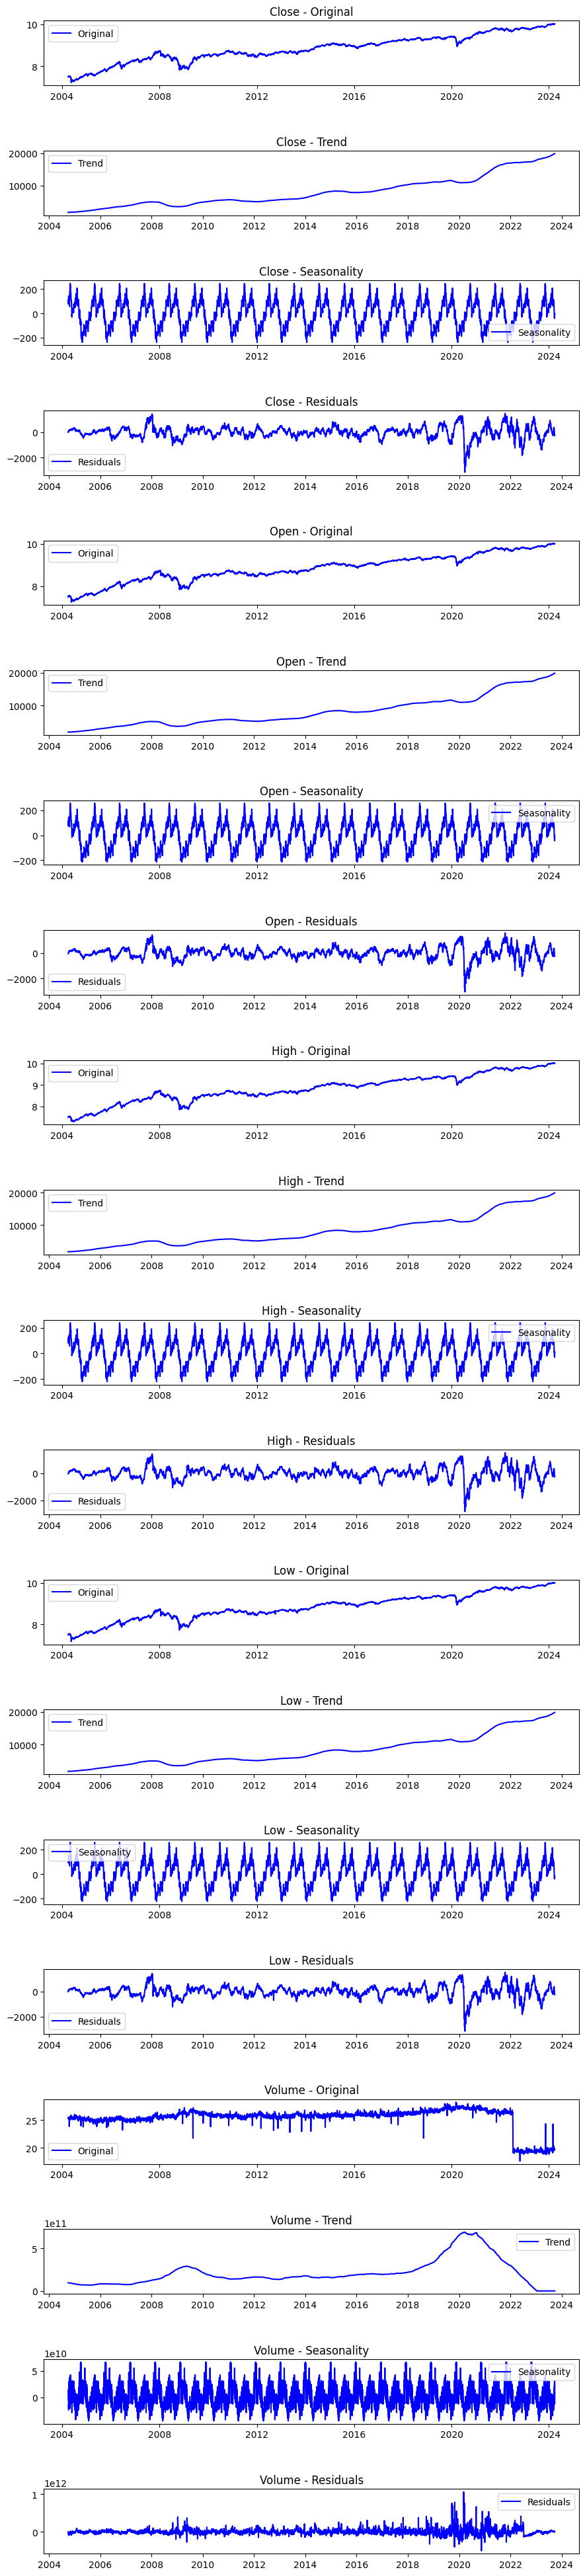

In [8]:
decomposition_plot(df,0)


Results of Dickey-Fuller Test for Close: 

Test Statistic                    1.349098
p-value                           0.996870
#Lags Used                       12.000000
Number of Observations Used    4951.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                    1.257002
p-value                           0.996357
#Lags Used                        9.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                    1.544353
p-value                           0.997681
#Lags Used                       32.000000
Number of Observations Used    4931.000000
Critical Value (1%)              -3.431677
Critical Value (5%)    

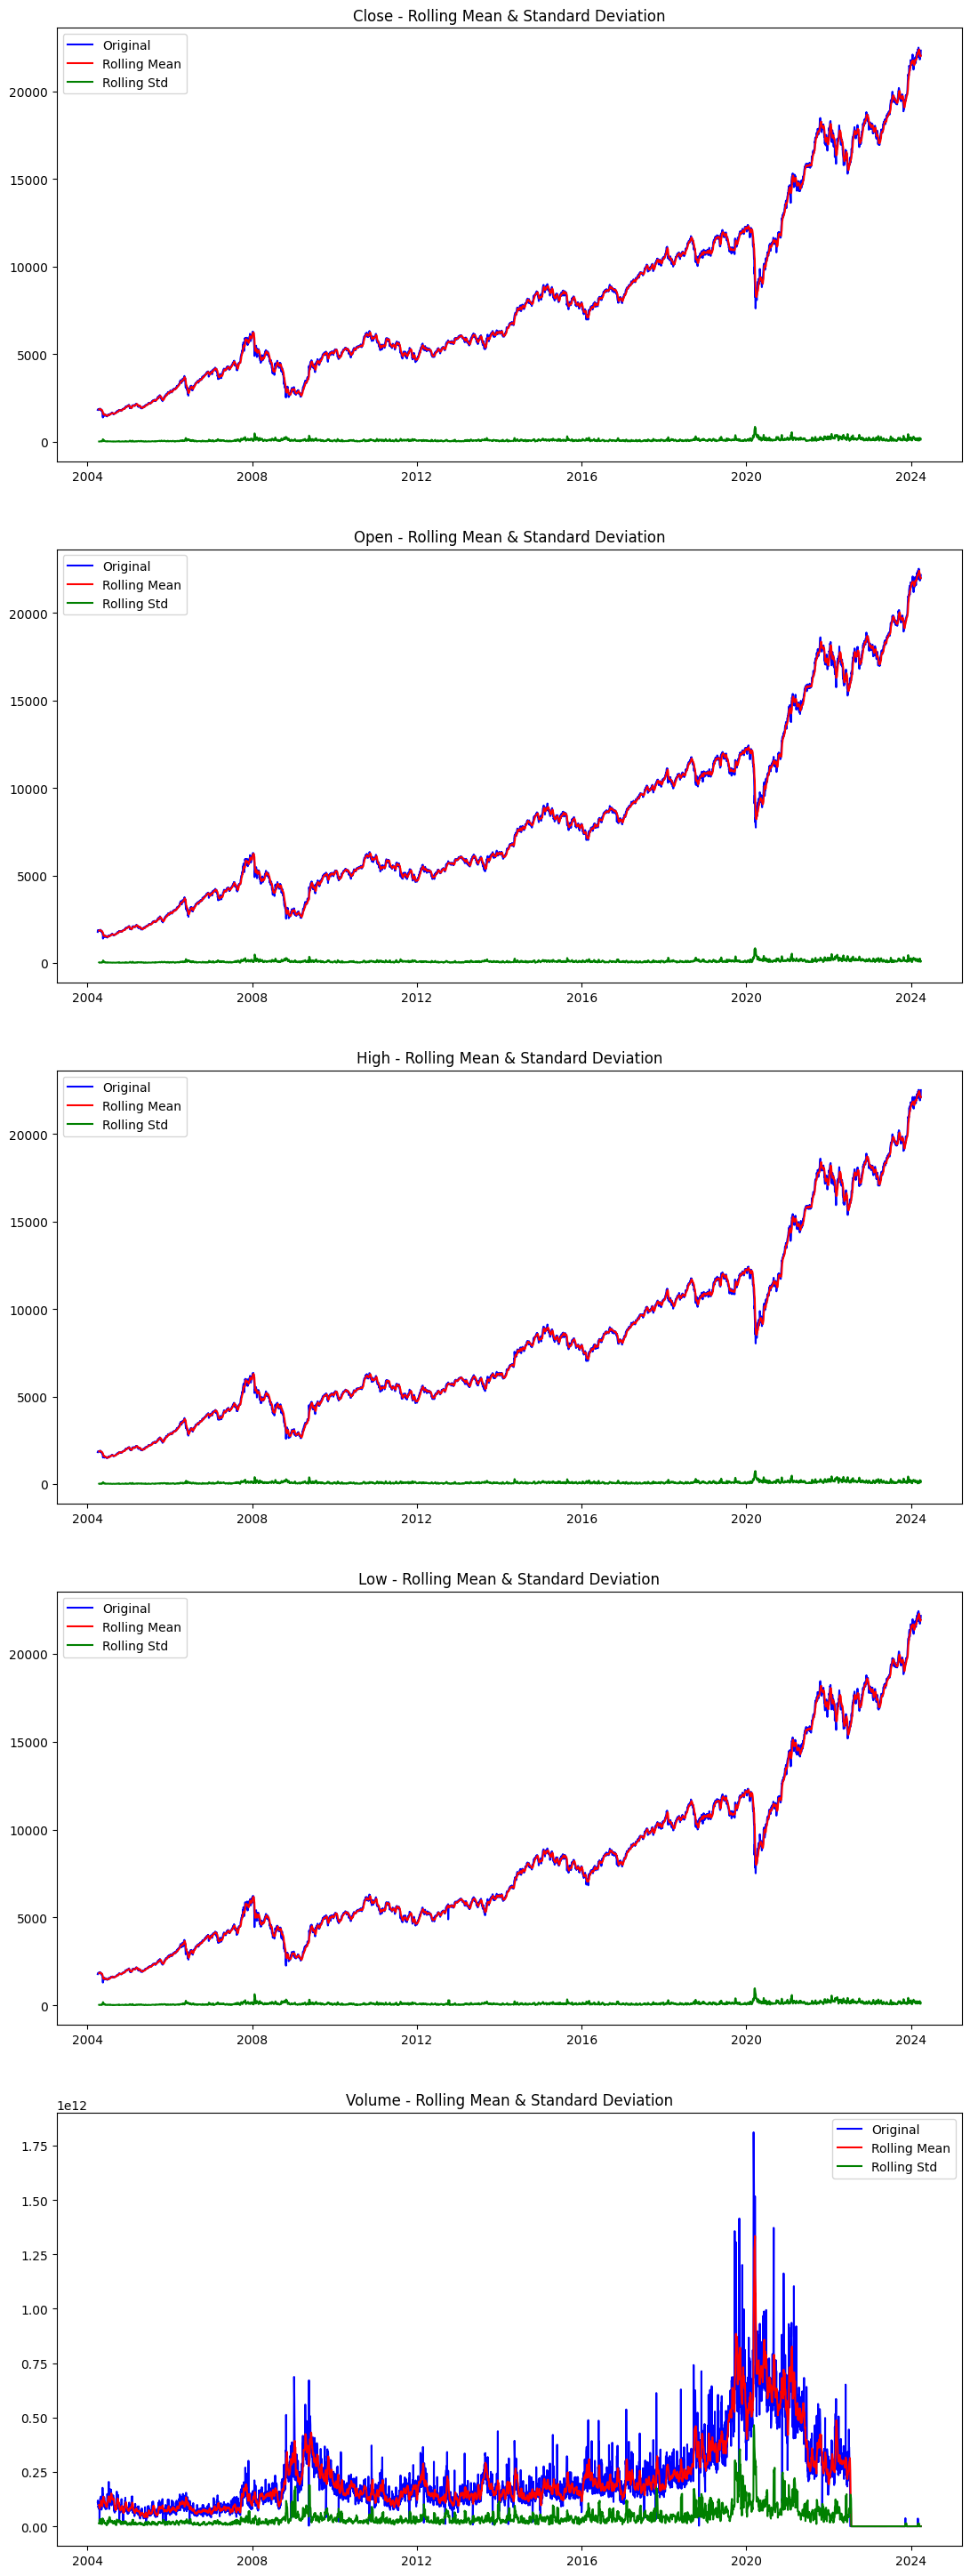

In [9]:
stationarity_check(df,0)

In [10]:
normality_check(df,0)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 675.0280993795265, p-value: 2.627305983610334e-147
Normal Test ---- statistic: 504.81198903098834, p-value: 2.406962824292277e-110

Normality Check for Open:
Jarque-Bera Test ---- statistic: 672.5233009814369, p-value: 9.192226483189286e-147
Normal Test ---- statistic: 503.39954159348014, p-value: 4.8772885117458017e-110

Normality Check for High:
Jarque-Bera Test ---- statistic: 673.6864999374262, p-value: 5.138487119485244e-147
Normal Test ---- statistic: 504.0545220377235, p-value: 3.515209799811577e-110

Normality Check for Low:
Jarque-Bera Test ---- statistic: 674.4503951127173, p-value: 3.5071758545352347e-147
Normal Test ---- statistic: 504.4742920987259, p-value: 2.8497012949038815e-110

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 14973.34962164349, p-value: 0.0
Normal Test ---- statistic: 2330.364945660487, p-value: 0.0


### After 1st Difference

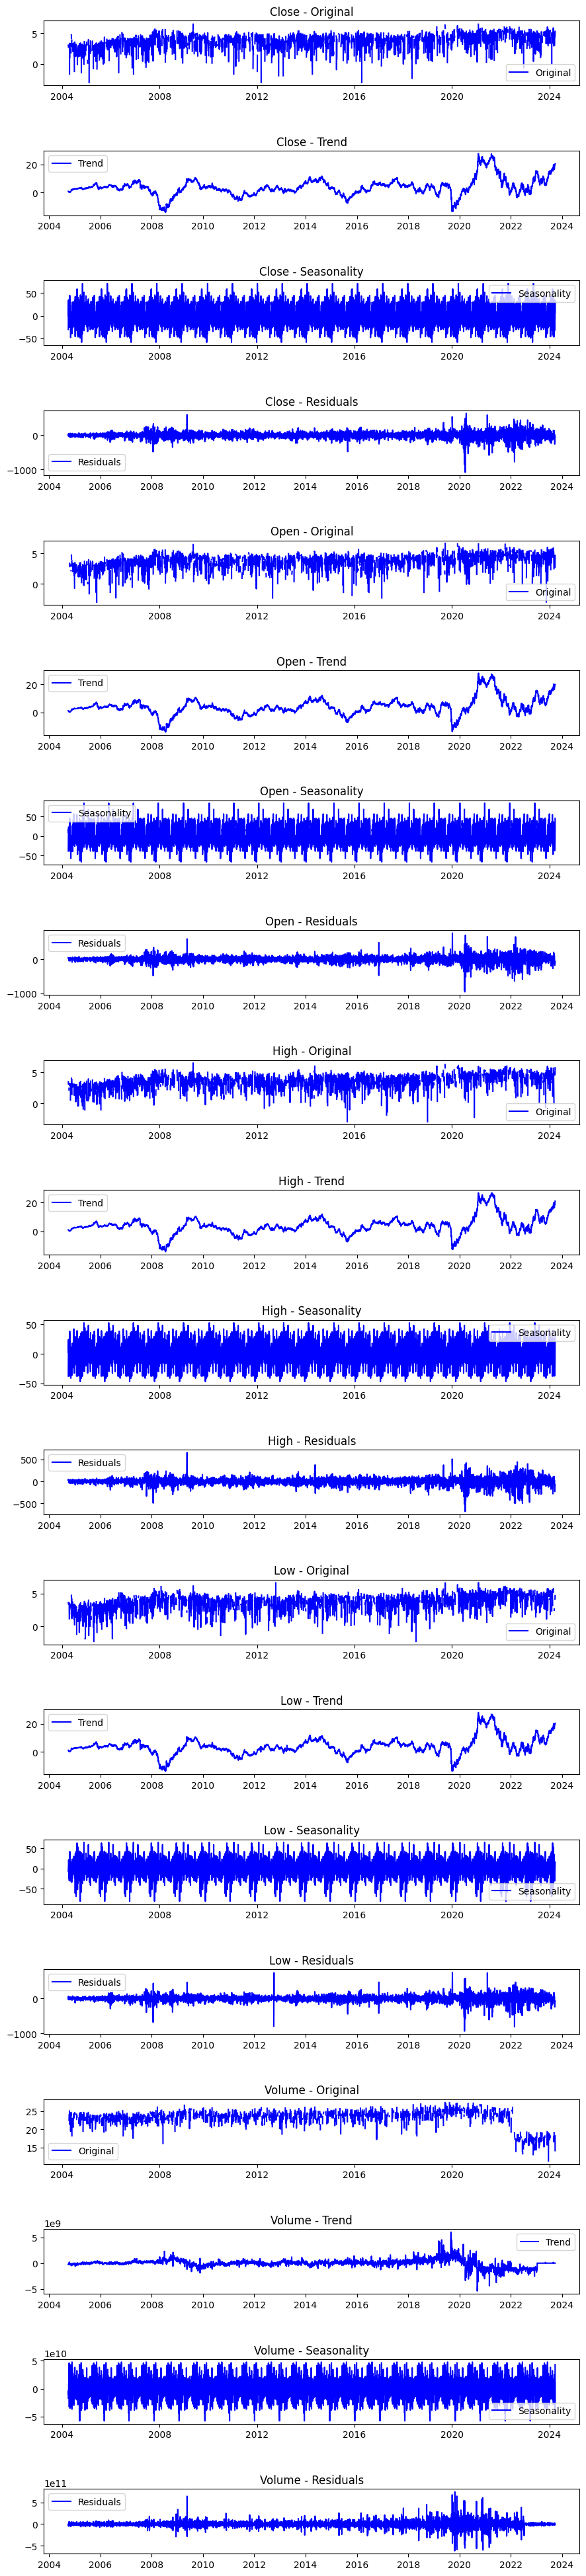

In [11]:
decomposition_plot(df,1)


Results of Dickey-Fuller Test for Close: 

Test Statistic                  -19.647957
p-value                           0.000000
#Lags Used                       11.000000
Number of Observations Used    4951.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                  -22.405511
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                -1.296929e+01
p-value                        3.105619e-24
#Lags Used                     3.100000e+01
Number of Observations Used    4.931000e+03
Critical Value (1%)           -3.431677e+00
Critical Value (5%

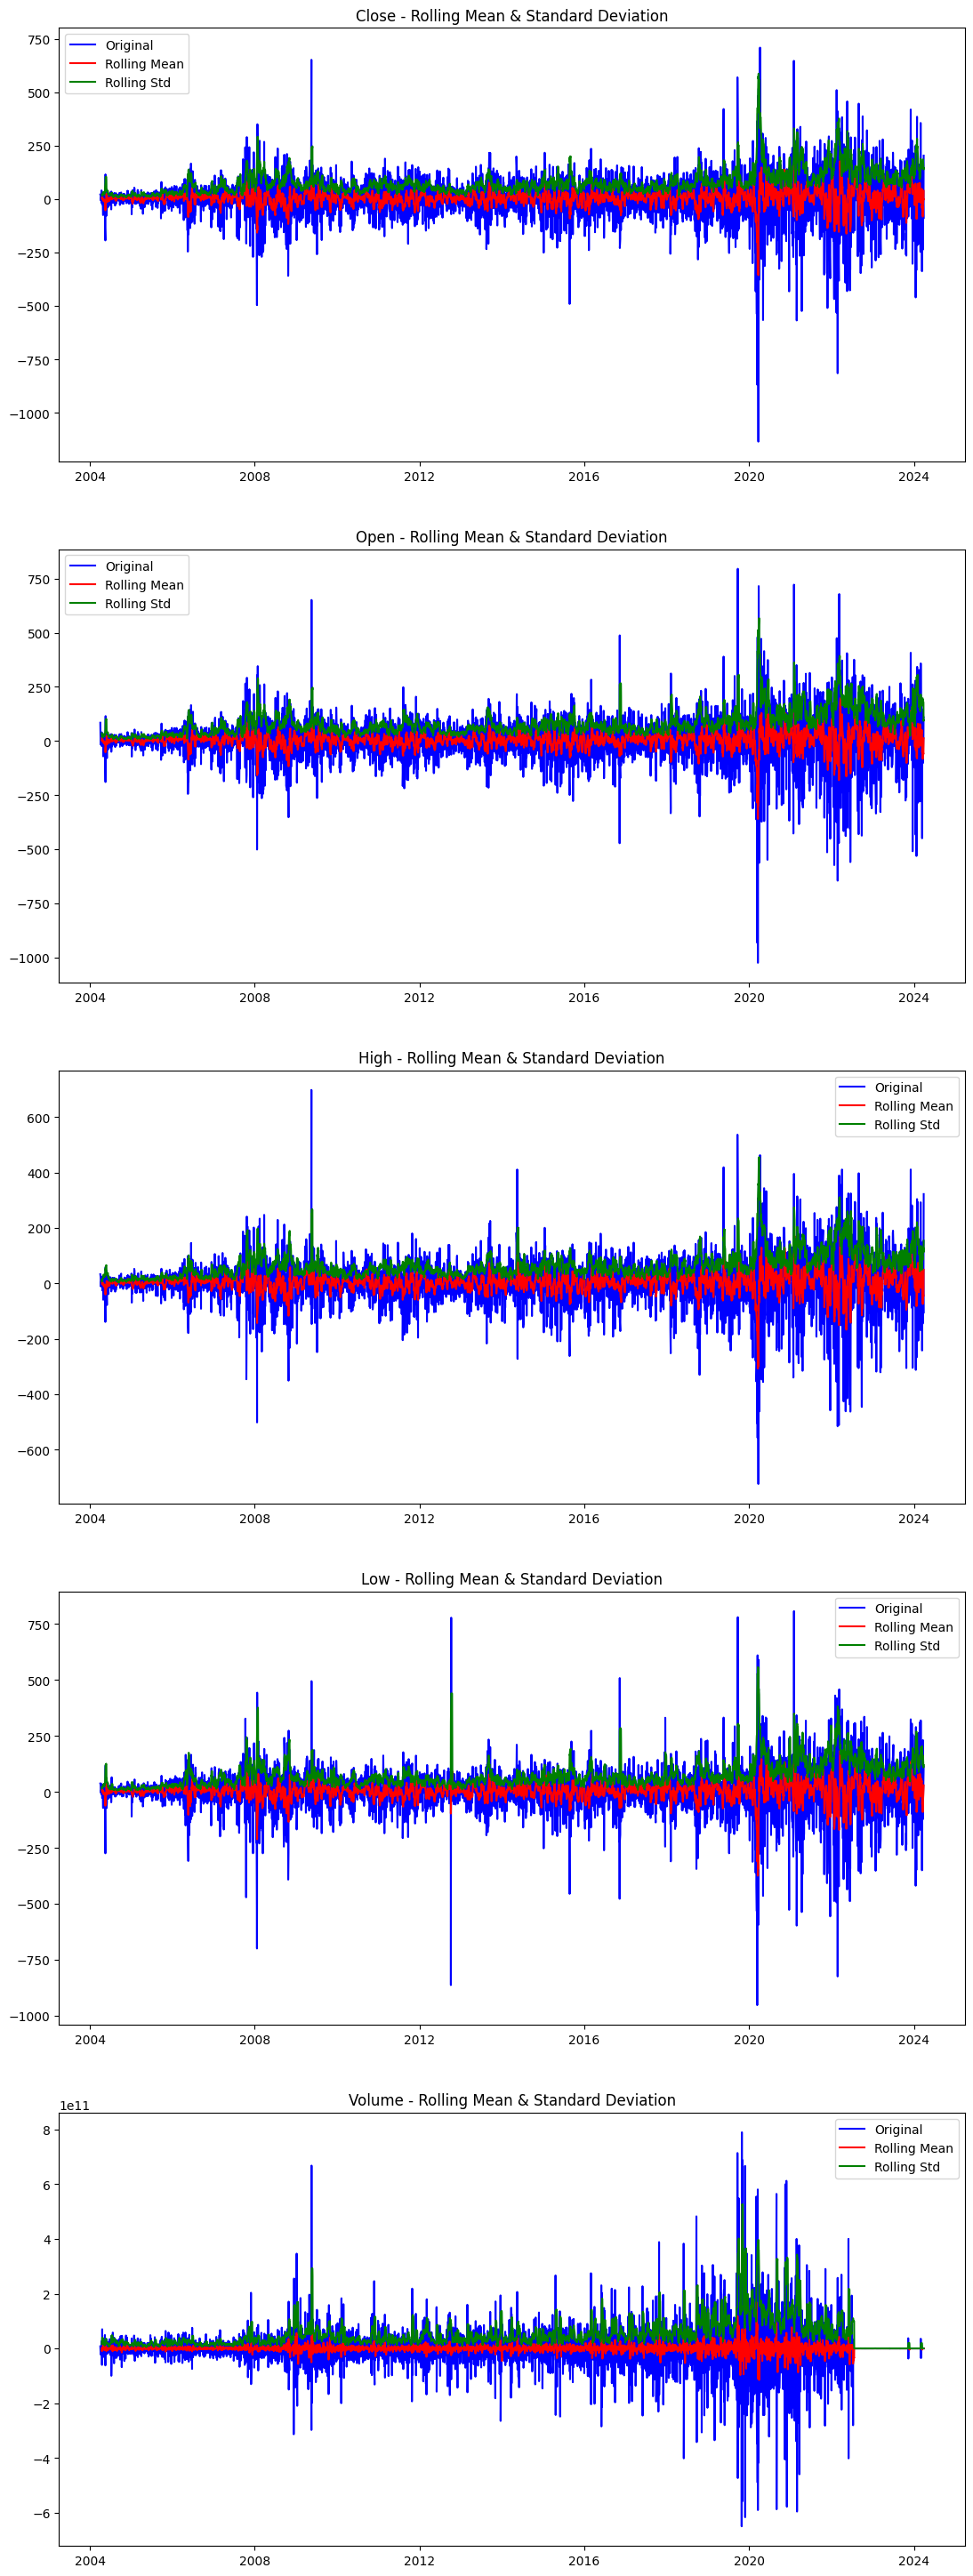

In [12]:
stationarity_check(df,1)

In [13]:
normality_check(df,1)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 25543.62376715562, p-value: 0.0
Normal Test ---- statistic: 1277.024504287748, p-value: 4.984851972906545e-278

Normality Check for Open:
Jarque-Bera Test ---- statistic: 17557.510960948526, p-value: 0.0
Normal Test ---- statistic: 1002.1084647886211, p-value: 2.482628501135881e-218

Normality Check for High:
Jarque-Bera Test ---- statistic: 12758.849700421077, p-value: 0.0
Normal Test ---- statistic: 932.5741580658379, p-value: 3.1195689800938485e-203

Normality Check for Low:
Jarque-Bera Test ---- statistic: 31282.289131704096, p-value: 0.0
Normal Test ---- statistic: 1324.7749362826846, p-value: 2.1319533835605802e-288

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 102226.04839281146, p-value: 0.0
Normal Test ---- statistic: 1527.026729312884, p-value: 0.0


### Outlier Check

Since price gradually increases, it does not make sense to use traditional outlier checking methods. Therefore we calculate the daily change and then the outliers in those

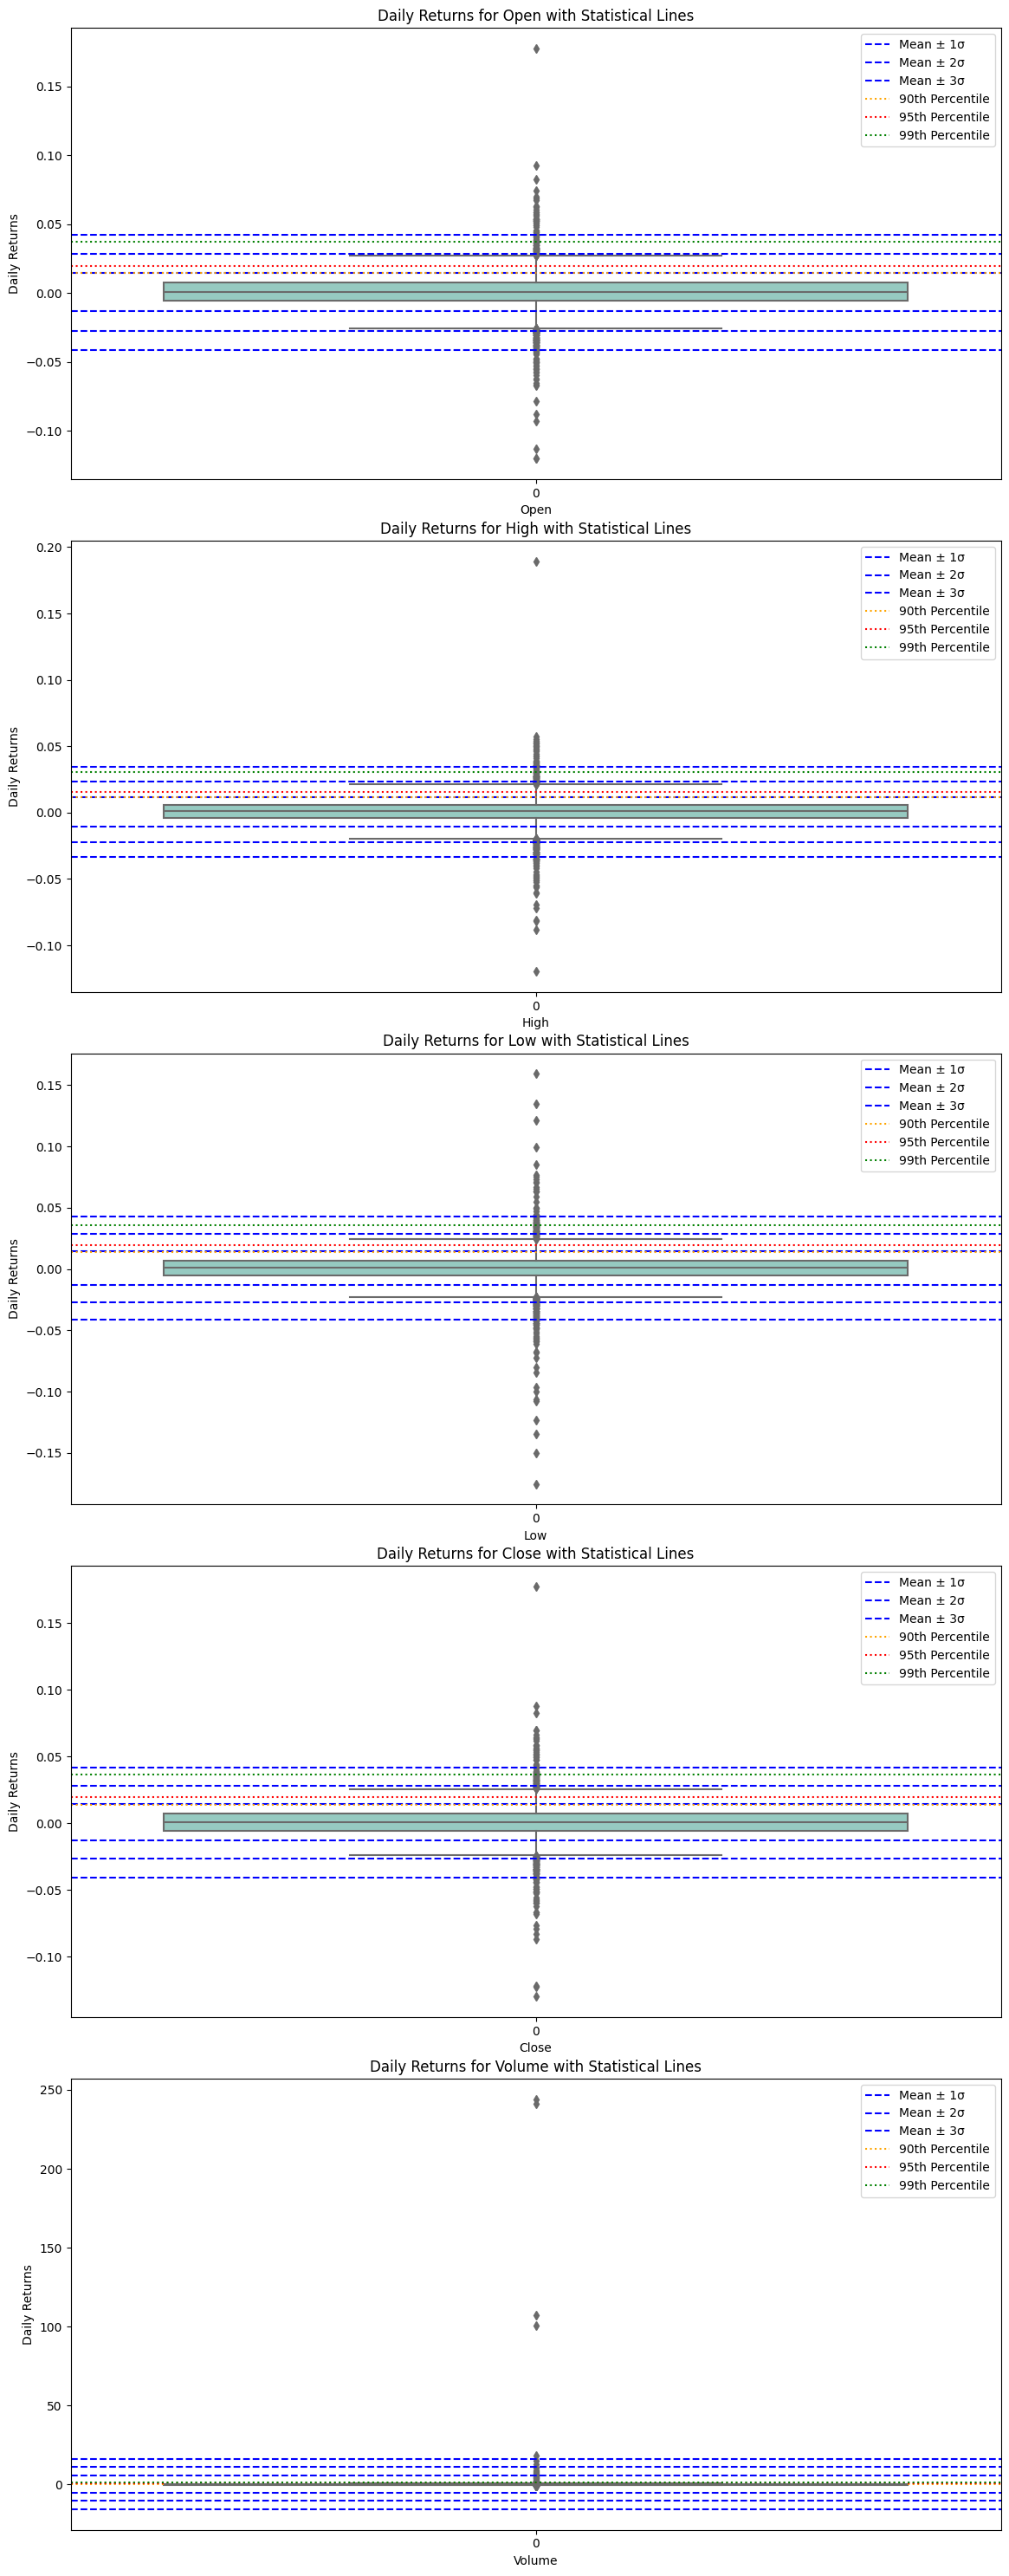

In [14]:
daily_returns(df)

## Outlier Removal 


In [15]:
df['daily_return'] = df['Close'].pct_change()
df['daily_return'] = df['daily_return'].fillna(0)
#mean plus 3sigma value for absolute daily returns
mean = df['daily_return'].mean()
std = df['daily_return'].std()
upper_limit = mean + 2*std
lower_limit = mean - 2*std
print(f'Mean: {mean}, Std: {std}, Upper Limit: {upper_limit}, Lower Limit: {lower_limit}')
#number of rows that are outside the 3 sigma range
print(f'Number of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])}')
print(f'Percentage of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])/len(df)*100}% ')

#if daily return is outside 3 sigma range, replace all the values with previous day's values
for i in range(1,len(df)):
    if df['daily_return'][i]>upper_limit or df['daily_return'][i]<lower_limit:
        df['Close'][i] = df['Close'][i-1]
        df['Open'][i] = df['Open'][i-1]
        df['High'][i] = df['High'][i-1]
        df['Low'][i] = df['Low'][i-1]
        df['Volume'][i] = df['Volume'][i-1]
        df['daily_return'][i] = 'NaN'

Mean: 0.0005985155699039544, Std: 0.01364459026906905, Upper Limit: 0.027887696108042054, Lower Limit: -0.026690664968234145
Number of rows outside 2 sigma range: 233
Percentage of rows outside 2 sigma range: 4.693795326349718% 


## Baseline Models


In [16]:
df_baseline = calculate_macd_signals(df)

Total Pofit: 730.9435845387073
Final Capital: 830.9435845387073
Overall Return: 730.9435845387073
Overall Return %: 730.9435845387073
Number of Days: 4963
Number of Trades: 728
Ratio of Trades to Days:  0.1466854724964739


In [17]:
df_base = profit_trades(df_baseline)

Total Pofit: 141646682.4619513
Final Capital: 141646782.4619513
Overall Return: 141646682.4619513
Overall Return %: 141646682.4619513
Number of Days: 4963
Number of Trades: 698
Ratio of Trades to Days:  0.14064074148700384


In [18]:
df_base = loss_trades(df_baseline)

Total Pofit: -99.9992875501282
Final Capital: 0.0007124498717969408
Overall Return: -99.9992875501282
Overall Return %: -99.9992875501282
Number of Days: 4963
Number of Trades: 691
Ratio of Trades to Days:  0.13923030425146082


## DQN

### Training

In [8]:
df_base = df[['Open','High','Low','Close','Volume']]
#include 26 and 12 ema
df_base['26ema'] = df_base['Close'].ewm(span=26).mean()
df_base['12ema'] = df_base['Close'].ewm(span=12).mean()
#fill na as 0
df_base = df_base.dropna()
df_base = df_base[['Open','High','Low','Close','Volume','26ema','12ema']]

#first 80% of the data is train
df_train = df_base.iloc[:int(len(df_base)*0.8)]
#last 20% of the data is test
df_test = df_base.iloc[int(len(df_base)*0.8):]

In [9]:
display(df_train.head())

display(df_test.head())

Open     High      Low    Close        Volume        26ema  \
Date                                                                        
2004-04-01  1771.45  1823.05  1771.45  1819.65  1.110700e+11  1819.650000   
2004-04-02  1856.10  1856.30  1809.00  1841.10  1.187400e+11  1830.787500   
2004-04-05  1841.10  1878.80  1840.00  1856.60  1.026000e+11  1840.061681   
2004-04-06  1870.80  1876.15  1836.90  1851.15  1.094100e+11  1843.161490   
2004-04-07  1856.40  1865.20  1833.95  1848.70  8.626000e+10  1844.445893   

                  12ema  
Date                     
2004-04-01  1819.650000  
2004-04-02  1831.268750  
2004-04-05  1841.155543  
2004-04-06  1844.310402  
2004-04-07  1845.503040

Open     High     Low    Close        Volume        26ema  \
Date                                                                       
2020-03-31  8949.10  9038.90  8522.9  8660.25  8.014500e+11  9640.650474   
2020-04-01  8949.10  9038.90  8522.9  8660.25  8.014500e+11  9568.028216   
2020-04-03  8356.55  8356.55  8055.8  8083.80  6.970300e+11  9458.085386   
2020-04-07  8356.55  8356.55  8055.8  8083.80  6.970300e+11  9356.286468   
2020-04-08  8688.90  9131.70  8653.9  8748.75  8.965300e+11  9311.283767   

                  12ema  
Date                     
2020-03-31  8780.106621  
2020-04-01  8761.667141  
2020-04-03  8657.379888  
2020-04-07  8569.136829  
2020-04-08  8596.769624

In [10]:
print(df_train.shape, df_test.shape)
print(df_train.shape[0] + df_test.shape[0])
print(df.shape[0])

(3971, 7) (993, 7)
4964
4964


In [11]:
window_size = 26
states = create_states(df_train, window_size)
test_states = create_states(df_test, window_size)
input_dim_conv = states.shape[2]
output_dim = 3
print("Shape of states:", states.shape)

Shape of states: (3945, 26, 7)


In [21]:
model = ConvDQN(input_dim_conv, output_dim, window_size)
memory = ReplayMemory(50000)
agent = DQNAgent(input_dim_conv, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.9995)

Episode 1/800, Total Reward: -430.15050000000093, Loss: 38.448816323031956
Episode 2/800, Total Reward: -40.54499999999935, Loss: 33.87743045290528
Episode 3/800, Total Reward: -228.59961187050055, Loss: 32.5549475681257
Episode 4/800, Total Reward: -425.42256476601034, Loss: 31.168468696432996
Episode 5/800, Total Reward: -228.59961187050055, Loss: 29.768452046157197
Episode 6/800, Total Reward: 14.299999999999272, Loss: 25.81787884402999
Episode 7/800, Total Reward: -205.7396506834505, Loss: 25.17816281056475
Episode 8/800, Total Reward: -1174.8999999999996, Loss: 24.30132203108051
Episode 9/800, Total Reward: -6.022681420793124, Loss: 18.932273721227332
Episode 10/800, Total Reward: 62.95582946250002, Loss: 14.9360776497998
Episode 11/800, Total Reward: -2809.0395, Loss: 9.763314847098435
Episode 12/800, Total Reward: -2.999399216913107e-06, Loss: 9.037675824865007
Episode 13/800, Total Reward: 6.402515524993822, Loss: 9.771989582177964
Episode 14/800, Total Reward: 208.177249500000

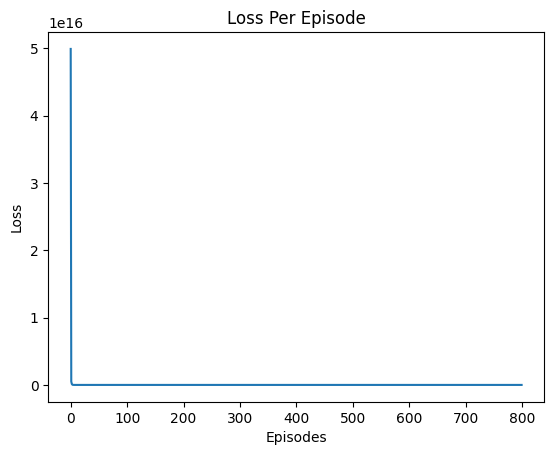

CPU times: user 1d 6h 53min 37s, sys: 8h 10min 33s, total: 1d 15h 4min 11s
Wall time: 10h 36min 30s


In [22]:
%%time
log_train = train_agent(agent, states, 800, batch_size=32)

In [23]:
log_train.to_csv('NIFTY50/log_train_CNN_reward_MA_800ep.csv', index=False)

In [24]:
#save the model
torch.save(agent.model.state_dict(), 'NIFTY50/DQN_CNN_reward_MA_800ep.pth')

## Test vol scale

In [21]:
df_base = df[['Open','High','Low','Close','Volume']]
#include 26 and 12 ema
df_base['26ema'] = df_base['Close'].ewm(span=26).mean()
df_base['12ema'] = df_base['Close'].ewm(span=12).mean()
#fill na as 0
df_base = df_base.dropna()
df_base = df_base[['Open','High','Low','Close','Volume','26ema','12ema']]
df_base['Volume'] = (df_base['Volume']-df_base['Volume'].min())/(df_base['Volume'].max()-df_base['Volume'].min())*(df_base['Close'].max()-df_base['Close'].min())+df_base['Close'].min()

#first 80% of the data is train
df_train = df_base.iloc[:int(len(df_base)*0.8)]
#last 20% of the data is test
df_test = df_base.iloc[int(len(df_base)*0.8):]

In [22]:
display(df_train.head())

display(df_test.head())

Open     High      Low    Close       Volume        26ema  \
Date                                                                       
2004-04-01  1771.45  1823.05  1771.45  1819.65  2736.486153  1819.650000   
2004-04-02  1856.10  1856.30  1809.00  1841.10  2825.630620  1830.787500   
2004-04-05  1841.10  1878.80  1840.00  1856.60  2638.043697  1840.061681   
2004-04-06  1870.80  1876.15  1836.90  1851.15  2717.192826  1843.161490   
2004-04-07  1856.40  1865.20  1833.95  1848.70  2448.132277  1844.445893   

                  12ema  
Date                     
2004-04-01  1819.650000  
2004-04-02  1831.268750  
2004-04-05  1841.155543  
2004-04-06  1844.310402  
2004-04-07  1845.503040

Open     High     Low    Close        Volume        26ema  \
Date                                                                       
2020-03-31  8949.10  9038.90  8522.9  8660.25  10760.417995  9640.650474   
2020-04-01  8949.10  9038.90  8522.9  8660.25  10760.417995  9568.028216   
2020-04-03  8356.55  8356.55  8055.8  8083.80   9546.798013  9458.085386   
2020-04-07  8356.55  8356.55  8055.8  8083.80   9546.798013  9356.286468   
2020-04-08  8688.90  9131.70  8653.9  8748.75  11865.483958  9311.283767   

                  12ema  
Date                     
2020-03-31  8780.106621  
2020-04-01  8761.667141  
2020-04-03  8657.379888  
2020-04-07  8569.136829  
2020-04-08  8596.769624

In [23]:
print(df_train.shape, df_test.shape)
print(df_train.shape[0] + df_test.shape[0])
print(df.shape[0])

(3971, 7) (993, 7)
4964
4964


In [24]:
window_size = 26
states = create_states(df_train, window_size)
test_states = create_states(df_test, window_size)
input_dim_conv = states.shape[2]
output_dim = 3
print("Shape of states:", states.shape)

Shape of states: (3945, 26, 7)


In [25]:
model = ConvDQN(input_dim_conv, output_dim, window_size)
memory = ReplayMemory(50000)
agent = DQNAgent(input_dim_conv, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.9995)

Episode 1/800, Total Reward: -703.5999999999985, Loss: 9.407660218130934
Episode 2/800, Total Reward: 116.45000000000073, Loss: 9.425172447218308
Episode 3/800, Total Reward: 387.045000000001, Loss: 8.177544832269254
Episode 4/800, Total Reward: -80.40869999999947, Loss: 8.86493987136894
Episode 5/800, Total Reward: -307.9514590649993, Loss: 10.66834038001155
Episode 6/800, Total Reward: -2.100000000000364, Loss: 9.542709125480057
Episode 7/800, Total Reward: 67.51268999999976, Loss: 9.341798400846503
Episode 8/800, Total Reward: -148.56433154999962, Loss: 9.731162078952153
Episode 9/800, Total Reward: 44.625100770000536, Loss: 8.802289746562568
Episode 10/800, Total Reward: -520.0248600000003, Loss: 8.62040099125252
Episode 11/800, Total Reward: -809.5617900000001, Loss: 8.545803614780414
Episode 12/800, Total Reward: -348.4219050000008, Loss: 7.962747438638937
Episode 13/800, Total Reward: 96.47950499999953, Loss: 9.448485752897012
Episode 14/800, Total Reward: -1491.3500000000004, L

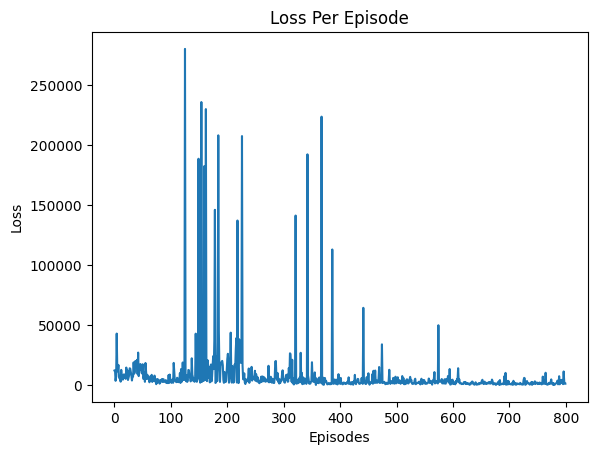

CPU times: user 1d 7h 38min 55s, sys: 8h 24min 2s, total: 1d 16h 2min 58s
Wall time: 10h 50min 6s


In [26]:
%%time
log_train = train_agent(agent, states, 800, batch_size=32)

In [27]:
log_train.to_csv('NIFTY50/log_train_CNN_reward_MA_800ep_volscaled.csv', index=False)

In [28]:
#save the model
torch.save(agent.model.state_dict(), 'NIFTY50/DQN_CNN_reward_MA_800ep_volscaled.pth')

### Evaluating and Testing

In [12]:
log_train = pd.read_csv('NIFTY50/log_train_CNN_reward_MA_800ep.csv')

In [29]:
log_train.rename(columns={'Reward':'Training_reward'}, inplace=True)

In [30]:
reward =[]
for i in range(1,log_train['Episode'].max()+1):
    last_episode = log_train[log_train['Episode'] == i]
    last_episode.reset_index(drop=True, inplace=True)
    last_episode['Close'] = last_episode['Price'].to_list()
    reward.append(list(capital_calculation(last_episode,'Action'))[-1]-100)

Total Pofit: 70.57148318393777
Total Pofit: 11.075357625319782
Total Pofit: 34.02428138687304
Total Pofit: 156.53485092998073
Total Pofit: 256.7220344004613
Total Pofit: 35.335635328286344
Total Pofit: 135.83419598820873
Total Pofit: 32.418405450817374
Total Pofit: 49.22768162388485
Total Pofit: 9.878672161394775
Total Pofit: -14.633763973549605
Total Pofit: 62.83686573093661
Total Pofit: 12.649010735912881
Total Pofit: 45.42062491775499
Total Pofit: 13.798539421055565
Total Pofit: 6.611099603671221
Total Pofit: 75.80913772042797
Total Pofit: 9.23948870740682
Total Pofit: -32.781096940858276
Total Pofit: 52.23774489159709
Total Pofit: 85.25293767270114
Total Pofit: 35.05281888035327
Total Pofit: 11.636572642056919
Total Pofit: 115.1812940822162
Total Pofit: 25.48884924139425
Total Pofit: 42.47181022987297
Total Pofit: 146.79828540659884
Total Pofit: 33.721354682534184
Total Pofit: 50.377169535240256
Total Pofit: 61.98372118162439
Total Pofit: 85.36419387693158
Total Pofit: 175.73847722

In [31]:
log_train['Reward'] = log_train['Episode'].apply(lambda x: reward[x-1])

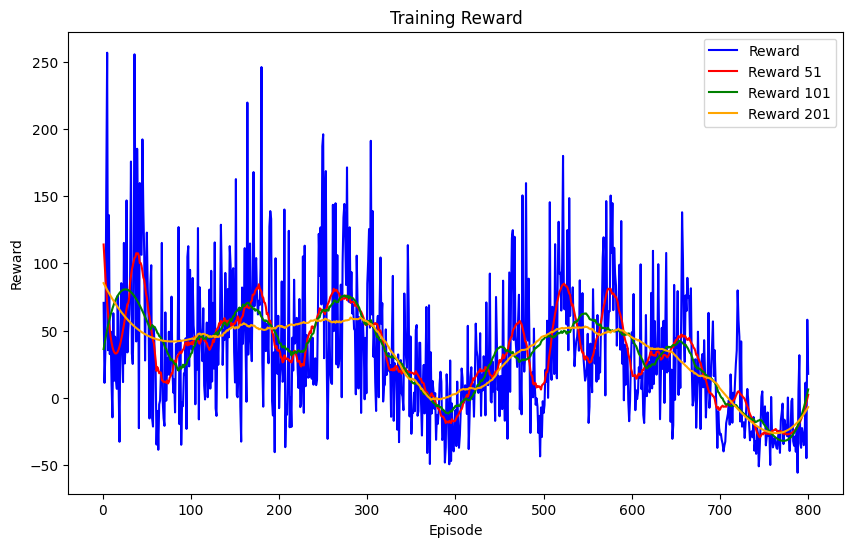

In [32]:
reward_filter(reward)

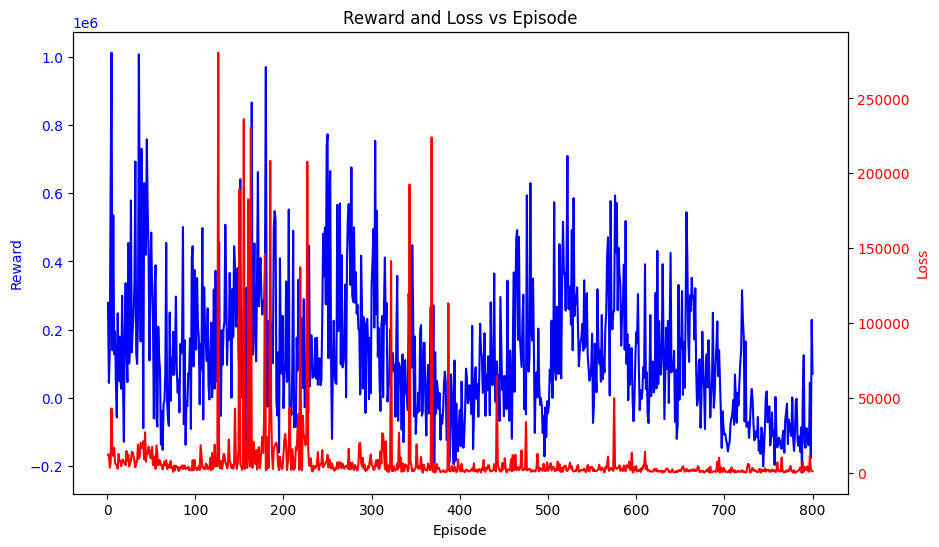

In [33]:
plot_training(log_train)

Number of Trades:  157


<Axes: >

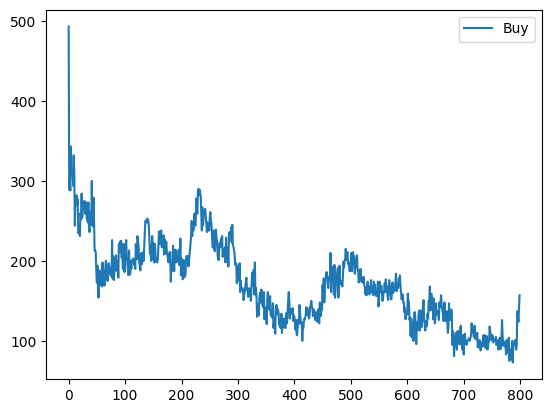

In [34]:
action_episode_df = create_action_episode_df(log_train)

action_episode_df = action_episode_df.apply(pd.Series.value_counts).transpose().reset_index()

print("Number of Trades: ", list(action_episode_df['Buy'])[-1])
#get value counts of all columns in the DataFrame
action_episode_df[['Buy']].plot()

In [35]:
# Initialize the agent
test_state_size = test_states.shape[2]
action_size = 3
model = ConvDQN(input_dim_conv, output_dim, window_size)
agent = DQNAgent(test_state_size, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=0, epsilon_min=0, epsilon_decay=0.9995)

In [20]:
model_path = 'NIFTY50/DQN_CNN_reward_MA_800ep.pth'
agent.model.load_state_dict(torch.load(model_path))

ConvDQN(
  (conv1): Conv1d(7, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1664, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [36]:
# Ensure the model is in evaluation mode
agent.model.eval()

ConvDQN(
  (conv1): Conv1d(7, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1664, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [37]:
evaluation_log = evaluate_agent(agent, test_states)
evaluation_log['Close'] = evaluation_log['Price']
evaluation_log['Capital'] = capital_calculation(evaluation_log, 'Action')

Total Pofit: 125.51477782254568


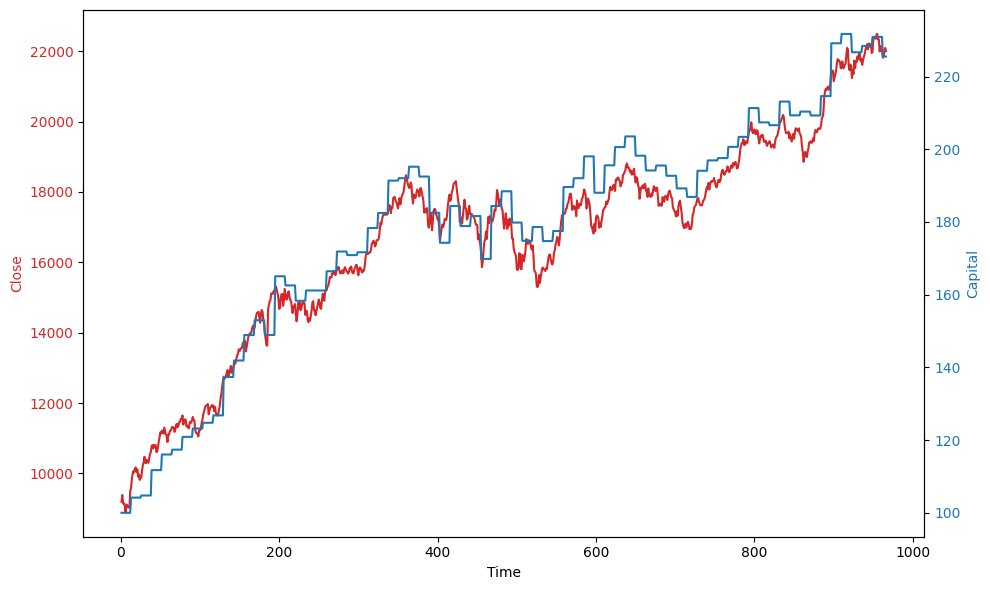

In [38]:
plot_dual_axis(evaluation_log)

In [39]:
print(f"Return without DQN: {(evaluation_log['Close'].iloc[-1] - evaluation_log['Close'].iloc[0])/evaluation_log['Close'].iloc[0] }%")
print(f"Return with DQN: {(evaluation_log['Capital'].iloc[-1] - 100)/100 }%")

Return without DQN: 1.3927124845730194%
Return with DQN: 1.2551477782254568%


In [40]:
all_states = create_states(df_base, window_size)
all_states_eval = evaluate_agent(agent, all_states)

In [41]:
all_states_eval['Close'] = all_states_eval['Price']
all_states_eval['Capital'] = capital_calculation(all_states_eval, 'Action')

Total Pofit: 831.5894934451044


In [42]:
print(f'Return without trading: {(all_states_eval["Close"].iloc[-1] - all_states_eval["Close"].iloc[0])/all_states_eval["Close"].iloc[0]}')
print(f"Return on Investment: {(all_states_eval['Capital'].iloc[-1] - 100)/100}")

Return without trading: 11.43835848736646
Return on Investment: 8.315894934451045


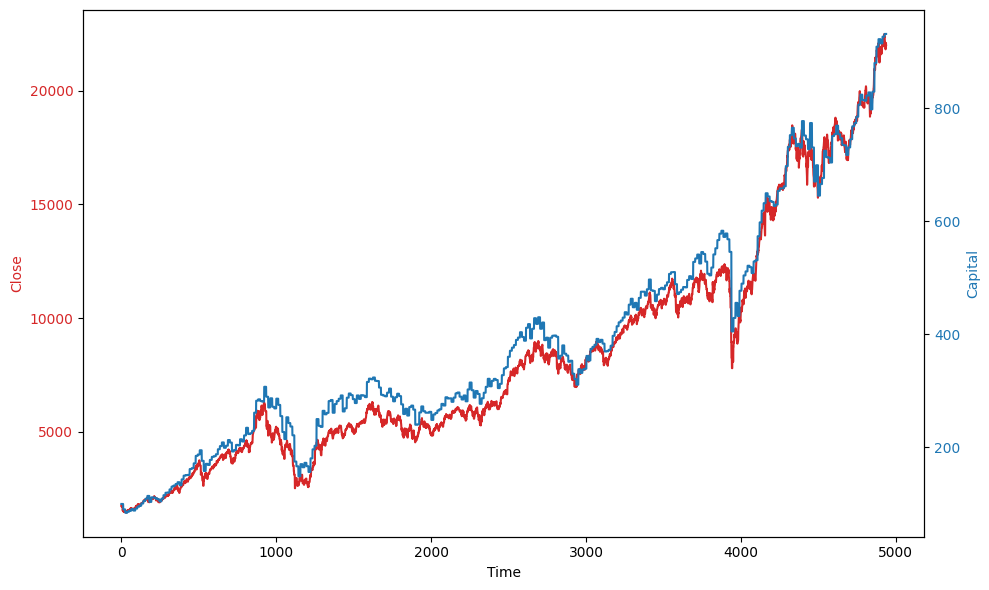

In [43]:
plot_dual_axis(all_states_eval)

In [44]:
evaluation_log['Date']= df_test.tail(evaluation_log.shape[0]).index
all_states_eval['Date'] = df.tail(all_states_eval.shape[0]).index
df_baseline['Date'] = df_baseline.index

In [45]:
eval_trade_summary = generate_trade_summary(evaluation_log,'Action','Price')
eval_trade_summary['Profit_Loss'].value_counts()

Profit    49
Loss      25
Name: Profit_Loss, dtype: int64

In [46]:
all_states_eval_trade_summary = generate_trade_summary(all_states_eval,'Action','Price')
all_states_eval_trade_summary['Profit_Loss'].value_counts()


Profit    229
Loss      150
Name: Profit_Loss, dtype: int64

In [47]:
macd_trade_summary = generate_trade_summary(df_baseline,'MACD_Trades','Close')
macd_trade_summary['Profit_Loss'].value_counts()

Profit    194
Loss      170
Name: Profit_Loss, dtype: int64

In [48]:
test_trades = test_trades_summary(df_test, evaluation_log)

Total Pofit: 56.35823329817134
Final Capital: 156.35823329817134
Overall Return: 56.35823329817134
Overall Return %: 56.35823329817134
Number of Days: 992
Number of Trades: 138
Ratio of Trades to Days:  0.13911290322580644

--- Test Trades Summary ---
Return without DQN: 1.578%
Return with DQN: 125.515%
Return with MACD: 56.358%
Return with Combined Capital: 181.873%
